# Similar Web Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\SimilarWeb.xlsx - Sheet1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Website Domain          5 non-null      object 
 1   Global Rank             5 non-null      int64  
 2   Country Rank            5 non-null      int64  
 3   Industry Rank           5 non-null      int64  
 4   Total Visits            5 non-null      object 
 5   Desktop Traffic Share   5 non-null      object 
 6   Mobile Traffic Share    5 non-null      object 
 7   Visit Duration          5 non-null      object 
 8   Pages Per Visit         5 non-null      float64
 9   Bounce Rate             5 non-null      object 
 10  Page Views              5 non-null      object 
 11  Direct                  5 non-null      object 
 12  Organic Search          5 non-null      object 
 13  Paid Search             5 non-null      object 
 14  Referrals               5 non-null      object

In [5]:
df.head()

,Website Domain,Global Rank,Country Rank,Industry Rank,Total Visits,Desktop Traffic Share,Mobile Traffic Share,Visit Duration,Pages Per Visit,Bounce Rate,Page Views,Direct,Organic Search,Paid Search,Referrals,Display Ads,Email,Marketing Channels,Top referring websites
0,limelight.pk,18475,93,482,2.7M,3.70%,96.30%,0:02:27,5.41,20.87%,14.5M,654.2K,1.2M,129.5K,33.8K,7.5K,314,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN
1,gulahmedshop.com,27325,148,735,1.5M,11.50%,88.50%,0:03:29,6.58,40.18%,9.9M,448.9K,588.7K,188.0K,21.7K,6.8K,320,"Direct,Organic,Paid,Referrals,Display,Social,E...","chatgpt.com,ahrefs.com"
2,nishatlinen.com,13332,52,333,3.7M,9.70%,90.30%,0:03:30,6.84,18.49%,25.0M,1.5M,1.4M,221.3K,65.8K,8.2K,639,"Direct,Organic,Paid,Referrals,Display,Social,E...","nishatmillsltd.com,clothingbrands.co,sellercen..."
3,zellbury.com,15388,60,403,2.9M,5.80%,94.20%,0:02:36,5.99,25.95%,17.3M,1.2M,1.1M,2.0K,41.3K,5.6K,481,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN
4,bonanzasatrangi.com,68326,427,1909,626.3K,6.70%,93.30%,0:02:16,4.46,36.35%,2.8M,119.2K,287.2K,95.3K,7.9K,478,81,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN


In [6]:
# droping column to remove redundancy
df.drop('Marketing Channels', axis='columns')

,Website Domain,Global Rank,Country Rank,Industry Rank,Total Visits,Desktop Traffic Share,Mobile Traffic Share,Visit Duration,Pages Per Visit,Bounce Rate,Page Views,Direct,Organic Search,Paid Search,Referrals,Display Ads,Email,Top referring websites
0,limelight.pk,18475,93,482,2.7M,3.70%,96.30%,0:02:27,5.41,20.87%,14.5M,654.2K,1.2M,129.5K,33.8K,7.5K,314,NaN
1,gulahmedshop.com,27325,148,735,1.5M,11.50%,88.50%,0:03:29,6.58,40.18%,9.9M,448.9K,588.7K,188.0K,21.7K,6.8K,320,"chatgpt.com,ahrefs.com"
2,nishatlinen.com,13332,52,333,3.7M,9.70%,90.30%,0:03:30,6.84,18.49%,25.0M,1.5M,1.4M,221.3K,65.8K,8.2K,639,"nishatmillsltd.com,clothingbrands.co,sellercen..."
3,zellbury.com,15388,60,403,2.9M,5.80%,94.20%,0:02:36,5.99,25.95%,17.3M,1.2M,1.1M,2.0K,41.3K,5.6K,481,NaN
4,bonanzasatrangi.com,68326,427,1909,626.3K,6.70%,93.30%,0:02:16,4.46,36.35%,2.8M,119.2K,287.2K,95.3K,7.9K,478,81,NaN


In [7]:
def convert_to_number(val):
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('M'):
            return float(val[:-1]) * 1_000_000
        elif val.endswith('K'):
            return float(val[:-1]) * 1_000
        else:
            return float(val.replace(',', ''))
    return val


In [8]:
cols_to_convert = ['Total Visits', 'Page Views', 'Direct', 'Organic Search', 
                   'Paid Search', 'Referrals', 'Display Ads', 'Email']

for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_number)


In [9]:
import pandas as pd
df['Visit Duration (seconds)'] = pd.to_timedelta(df['Visit Duration']).dt.total_seconds()


In [10]:
#converting percentages to float for numeric calculations
percent_columns = ['Desktop Traffic Share', 'Mobile Traffic Share', 'Bounce Rate']
for col in percent_columns:
    df[col] = (
        df[col].astype(str).str.replace('%', '', regex=False).replace('Nan', None)
        .astype(float)
    )

In [11]:
df

,Website Domain,Global Rank,Country Rank,Industry Rank,Total Visits,Desktop Traffic Share,Mobile Traffic Share,Visit Duration,Pages Per Visit,Bounce Rate,Page Views,Direct,Organic Search,Paid Search,Referrals,Display Ads,Email,Marketing Channels,Top referring websites,Visit Duration (seconds)
0,limelight.pk,18475,93,482,2700000.0,3.7,96.3,0:02:27,5.41,20.87,14500000.0,654200.0,1200000.0,129500.0,33800.0,7500.0,314,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN,147.0
1,gulahmedshop.com,27325,148,735,1500000.0,11.5,88.5,0:03:29,6.58,40.18,9900000.0,448900.0,588700.0,188000.0,21700.0,6800.0,320,"Direct,Organic,Paid,Referrals,Display,Social,E...","chatgpt.com,ahrefs.com",209.0
2,nishatlinen.com,13332,52,333,3700000.0,9.7,90.3,0:03:30,6.84,18.49,25000000.0,1500000.0,1400000.0,221300.0,65800.0,8200.0,639,"Direct,Organic,Paid,Referrals,Display,Social,E...","nishatmillsltd.com,clothingbrands.co,sellercen...",210.0
3,zellbury.com,15388,60,403,2900000.0,5.8,94.2,0:02:36,5.99,25.95,17300000.0,1200000.0,1100000.0,2000.0,41300.0,5600.0,481,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN,156.0
4,bonanzasatrangi.com,68326,427,1909,626300.0,6.7,93.3,0:02:16,4.46,36.35,2800000.0,119200.0,287200.0,95300.0,7900.0,478.0,81,"Direct,Organic,Paid,Referrals,Display,Social,E...",NaN,136.0


# Data Analysis

In [13]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

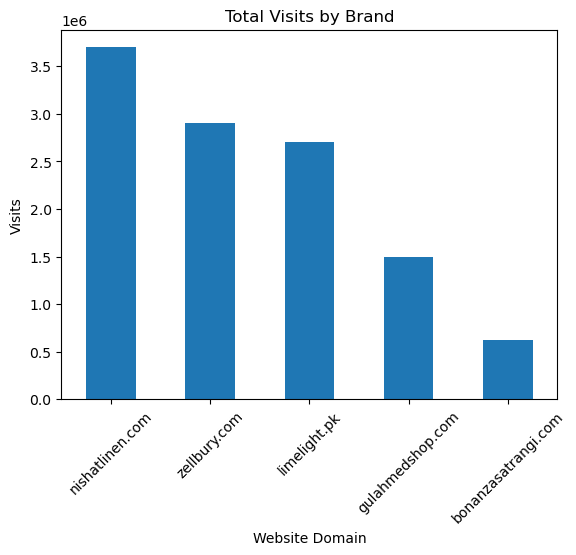

In [14]:
# total traffic comparision
plt.figure(figsize=(10,6))
df.sort_values('Total Visits', ascending=False).plot(x='Website Domain', y='Total Visits', kind='bar', legend= False)
plt.title('Total Visits by Brand')
plt.ylabel("Visits")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

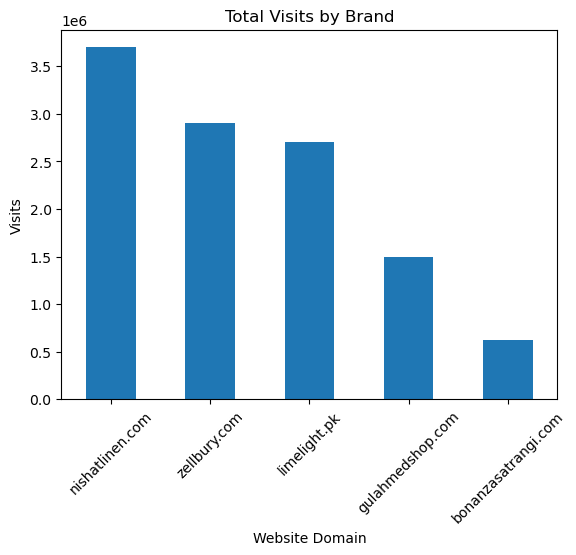

In [15]:
# total traffic comparision
plt.figure(figsize=(10,6))
df.sort_values('Total Visits', ascending=False).plot(x='Website Domain', y='Total Visits', kind='bar', legend= False)
plt.title('Total Visits by Brand')
plt.ylabel("Visits")
plt.xticks(rotation=45)
plt.show()

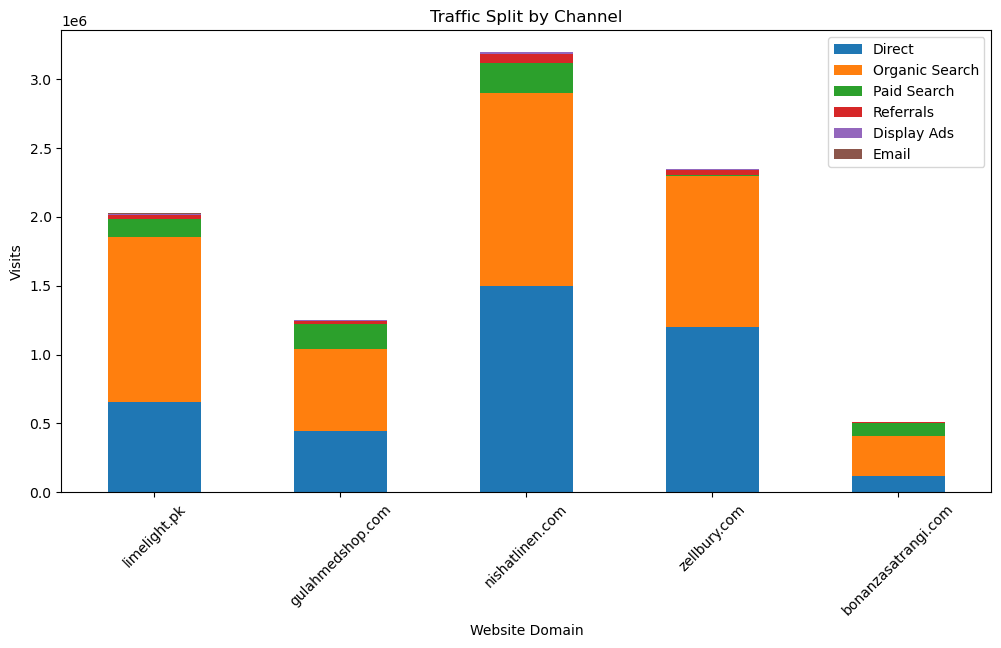

In [16]:
channel_cols = ['Direct', 'Organic Search', 'Paid Search', 'Referrals', 'Display Ads', 'Email']
df_channels = df.set_index('Website Domain')[channel_cols]
df_channels.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Traffic Split by Channel')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.show()

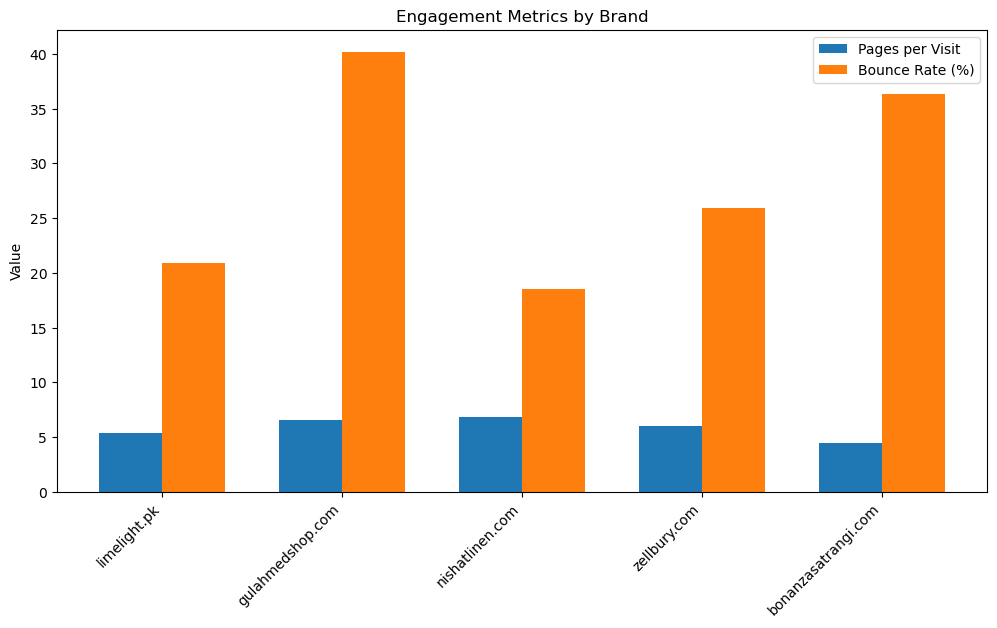

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Select metrics
engagement_cols = ['Pages Per Visit', 'Bounce Rate']

# Create bar positions
x = np.arange(len(df['Website Domain']))  # one position per brand
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Pages per Visit
bars1 = ax.bar(x - width/2, df['Pages Per Visit'], width, label='Pages per Visit')

# Bounce Rate
bars2 = ax.bar(x + width/2, df['Bounce Rate'], width, label='Bounce Rate (%)')

# Add labels & title
ax.set_ylabel("Value")
ax.set_title("Engagement Metrics by Brand")
ax.set_xticks(x)
ax.set_xticklabels(df['Website Domain'], rotation=45, ha="right")
ax.legend()

plt.show()


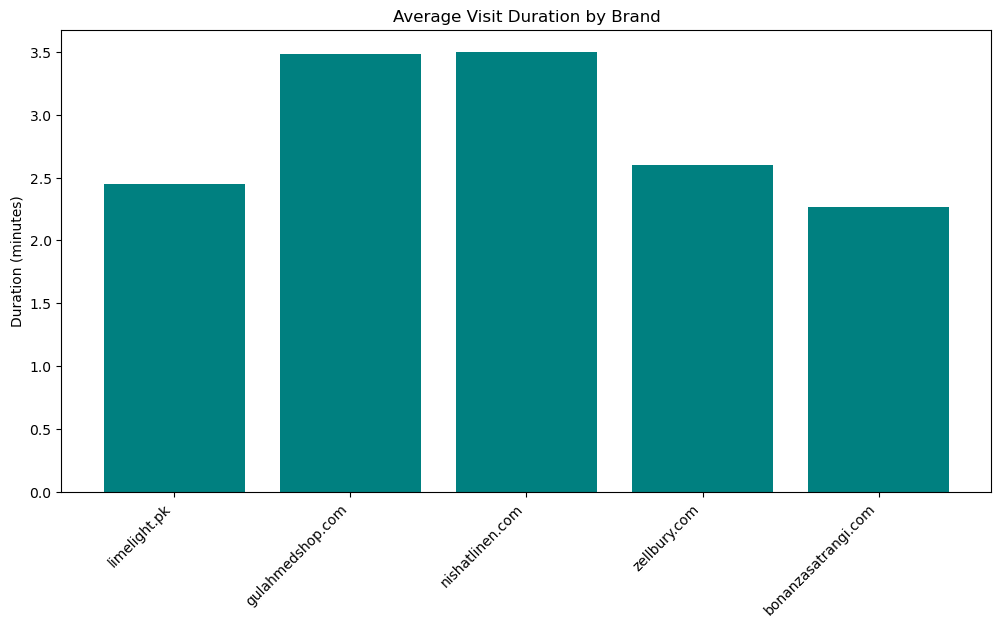

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Convert to minutes if you stored in seconds
df['Visit Duration (minutes)'] = df['Visit Duration (seconds)'] / 60  

plt.bar(df['Website Domain'], df['Visit Duration (minutes)'], color='teal')

plt.title("Average Visit Duration by Brand")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45, ha="right")

plt.show()


        Website Domain  Total Visits  Global Rank  Country Rank  Industry Rank
2      nishatlinen.com     3700000.0        13332            52            333
3         zellbury.com     2900000.0        15388            60            403
0         limelight.pk     2700000.0        18475            93            482
1     gulahmedshop.com     1500000.0        27325           148            735
4  bonanzasatrangi.com      626300.0        68326           427           1909


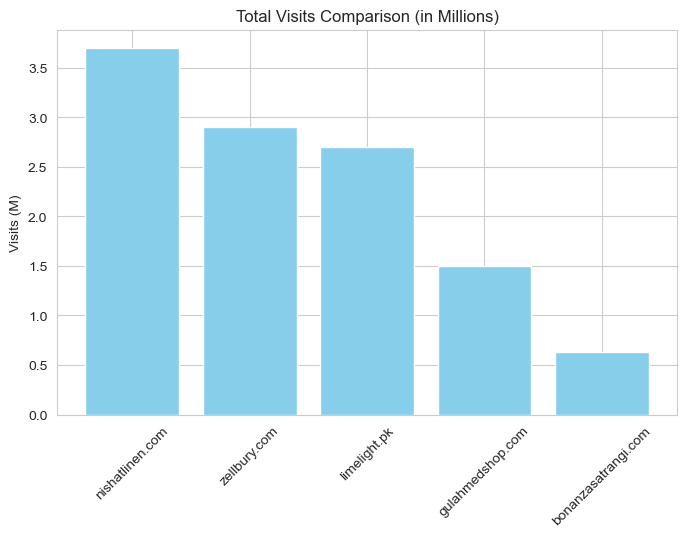

In [46]:
# QUESTION 1



import matplotlib.pyplot as plt

# Filter only the needed columns
traffic_df = df[["Website Domain", "Total Visits", "Global Rank", "Country Rank", "Industry Rank"]]

# Sort by total visits for clarity
traffic_sorted = traffic_df.sort_values("Total Visits", ascending=False)

# Display table for traffic comparison
print(traffic_sorted)

# Plot total visits comparison
plt.figure(figsize=(8,5))
plt.bar(traffic_sorted["Website Domain"], traffic_sorted["Total Visits"]/1_000_000, color="skyblue")
plt.title("Total Visits Comparison (in Millions)")
plt.ylabel("Visits (M)")
plt.xticks(rotation=45)
plt.savefig("chart1.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# QUESTION 02


# Step 1: Select relevant columns
metrics = df[['Website Domain', 'Visit Duration', 'Pages Per Visit', 'Bounce Rate']].copy()

# Step 2: Convert Visit Duration (hh:mm:ss) → seconds
metrics['Visit Duration'] = pd.to_timedelta(metrics['Visit Duration']).dt.total_seconds()

# Step 3: Split Limelight vs competitors
limelight = metrics[metrics['Website Domain'] == 'limelight.pk']
competitors = metrics[metrics['Website Domain'] != 'limelight.pk']

# Step 4: Calculate averages for competitors
comp_avg = competitors.mean(numeric_only=True)

# Step 5: Compare Limelight against competitor averages
comparision = limelight.set_index('Website Domain').T
comparision['Competitor Avg'] = comp_avg
comparision['Performance Gap'] = comparision['limelight.pk'] - comparision['Competitor Avg']

comparision

Website Domain,limelight.pk,Competitor Avg,Performance Gap
Visit Duration,147.00,177.7500,-30.7500
Pages Per Visit,5.41,5.9675,-0.5575
Bounce Rate,20.87,30.2425,-9.3725


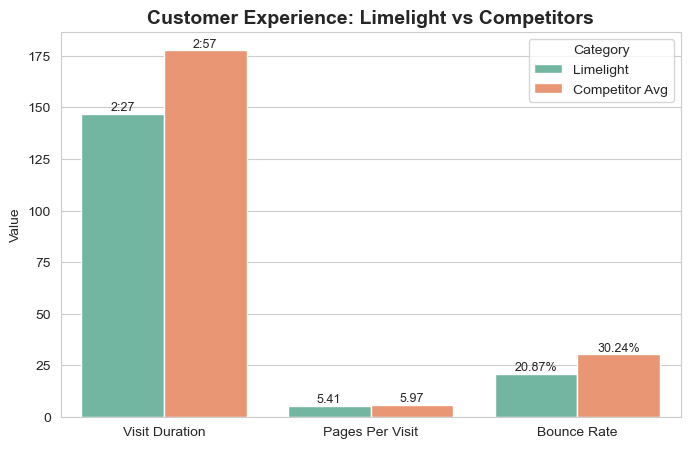

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your summary DataFrame
summary_df = pd.DataFrame({
    "Metric": ["Visit Duration", "Pages Per Visit", "Bounce Rate"],
    "Limelight": [147.00, 5.41, 20.87],
    "Competitor Avg": [177.75, 5.9675, 30.2425]
})

# Function to convert seconds → mm:ss
def sec_to_mmss(seconds):
    minutes = int(seconds // 60)
    sec = int(seconds % 60)
    return f"{minutes}:{sec:02d}"

# Keep raw values for plotting, but create custom labels
melted = summary_df.melt(id_vars="Metric", var_name="Category", value_name="Value")

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Metric", y="Value", hue="Category", data=melted, palette="Set2")

# Add custom labels
for p, (metric, category, value) in zip(ax.patches, melted.itertuples(index=False)):
    if metric == "Visit Duration":
        label = sec_to_mmss(value)   # mm:ss format
    elif metric == "Bounce Rate":
        label = f"{value:.2f}%"      # add %
    else:
        label = f"{value:.2f}"       # normal
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Customer Experience: Limelight vs Competitors", fontsize=14, fontweight="bold")
plt.ylabel("Value")
plt.xlabel("")
plt.savefig("chart2.png", dpi=300, bbox_inches='tight')
plt.show()


In [22]:

# Identify columns related to marketing channels
channel_cols = ['Direct', 'Organic Search', 'Paid Search', 
                 'Referrals', 'Display Ads', 'Email']

# Filter relevant data (Limelight vs competitors)
channel_data = df[['Website Domain'] + channel_cols].copy()

# Normalize channel traffic as percentage of total traffic for each brand
channel_data['Total Traffic'] = channel_data[channel_cols].sum(axis=1)
for col in channel_cols:
    channel_data.loc[: , col + ' %'] = channel_data[col] / channel_data['Total Traffic'] * 100

# Focus on Limelight and compare with competitors
limelight_channels = channel_data[channel_data['Website Domain'].str.lower() == 'limelight.pk']
competitors_channels = channel_data[channel_data['Website Domain'].str.lower() != 'limelight.pk']

# Average channel distribution for competitors
competitors_avg = competitors_channels[channel_cols].mean().reset_index()
competitors_avg.columns = ['Channel', 'Avg Competitor Traffic']

# Limelight channel distribution
limelight_channels_t = limelight_channels[channel_cols].T.reset_index()
limelight_channels_t.columns = ['Channel', 'Limelight Traffic']

# Merge for comparison
channel_comparison = limelight_channels_t.merge(competitors_avg, on='Channel')
channel_comparison['Difference'] = channel_comparison['Limelight Traffic'] - channel_comparison['Avg Competitor Traffic']

channel_comparison


,Channel,Limelight Traffic,Avg Competitor Traffic,Difference
0,Direct,654200.0,817025.00,-162825.00
1,Organic Search,1200000.0,843975.00,356025.00
2,Paid Search,129500.0,126650.00,2850.00
3,Referrals,33800.0,34175.00,-375.00
4,Display Ads,7500.0,5269.50,2230.50
5,Email,314.0,380.25,-66.25


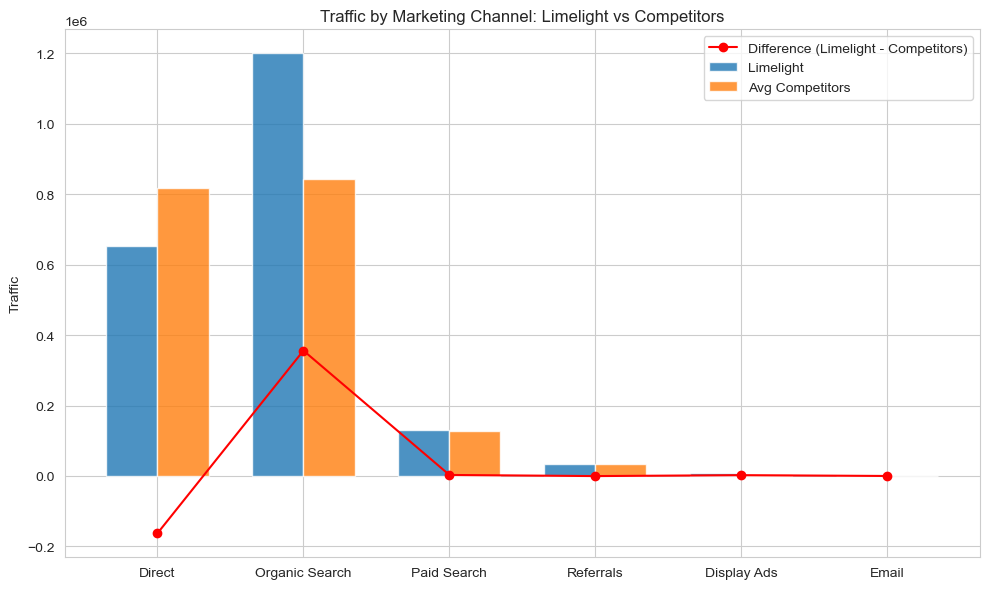

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your dataframe if different variable name)
channel_data = {
    "Channel": ["Direct", "Organic Search", "Paid Search", "Referrals", "Display Ads", "Email"],
    "Limelight Traffic": [654200, 1200000, 129500, 33800, 7500, 314],
    "Avg Competitor Traffic": [817025, 843975, 126650, 34175, 5269.5, 380.25],
    "Difference": [-162825, 356025, 2850, -375, 2230.5, -66.25]
}

import pandas as pd
df_channel = pd.DataFrame(channel_data)

# Plot grouped bar chart
plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(df_channel))

plt.bar(x, df_channel["Limelight Traffic"], width=bar_width, label="Limelight", alpha=0.8)
plt.bar([i + bar_width for i in x], df_channel["Avg Competitor Traffic"], width=bar_width, label="Avg Competitors", alpha=0.8)

# Add difference as a line with points
plt.plot([i + bar_width/2 for i in x], df_channel["Difference"], color="red", marker="o", label="Difference (Limelight - Competitors)")

# Formatting
plt.xticks([i + bar_width/2 for i in x], df_channel["Channel"])
plt.ylabel("Traffic")
plt.title("Traffic by Marketing Channel: Limelight vs Competitors")
plt.legend()
plt.tight_layout()
plt.savefig("chart3.png", dpi=300, bbox_inches='tight')
plt.show()
